# Projeto de Classificação de Grãos de Trigo

Este notebook contém a implementação do projeto de classificação de grãos de trigo usando aprendizado de máquina.

## 1. Preparação do Ambiente de Desenvolvimento

In [2]:
# Importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Configurando o estilo dos gráficos
import seaborn as sns
sns.set_theme()

# Carregando o dataset
df = pd.read_csv('seeds_dataset.txt', sep='\s+', header=None, engine='python')

# Renomeando as colunas
df.columns = ['Area', 'Perimetro', 'Compacidade', 'Comprimento_Nucleo', 'Largura_Nucleo', 'Coeficiente_Assimetria', 'Comprimento_Sulco_Nucleo', 'Classe']

print("Dataset carregado com sucesso. Shape:", df.shape)
df.head()

Dataset carregado com sucesso. Shape: (210, 8)


,Area,Perimetro,Compacidade,Comprimento_Nucleo,Largura_Nucleo,Coeficiente_Assimetria,Comprimento_Sulco_Nucleo,Classe
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 2. Análise Exploratória de Dados (EDA)

In [3]:
# Exibindo informações básicas do DataFrame
print("Informações do DataFrame:")
df.info()

print("\nEstatísticas descritivas:")
print(df.describe())

# Verificando valores ausentes
print("\nValores ausentes:")
print(df.isnull().sum())

Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area                      210 non-null    float64
 1   Perimetro                 210 non-null    float64
 2   Compacidade               210 non-null    float64
 3   Comprimento_Nucleo        210 non-null    float64
 4   Largura_Nucleo            210 non-null    float64
 5   Coeficiente_Assimetria    210 non-null    float64
 6   Comprimento_Sulco_Nucleo  210 non-null    float64
 7   Classe                    210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB

Estatísticas descritivas:
             Area   Perimetro  Compacidade  Comprimento_Nucleo  \
count  210.000000  210.000000   210.000000          210.000000   
mean    14.847524   14.559286     0.870999            5.628533   
std      2.909699    1.305959     0.023629  

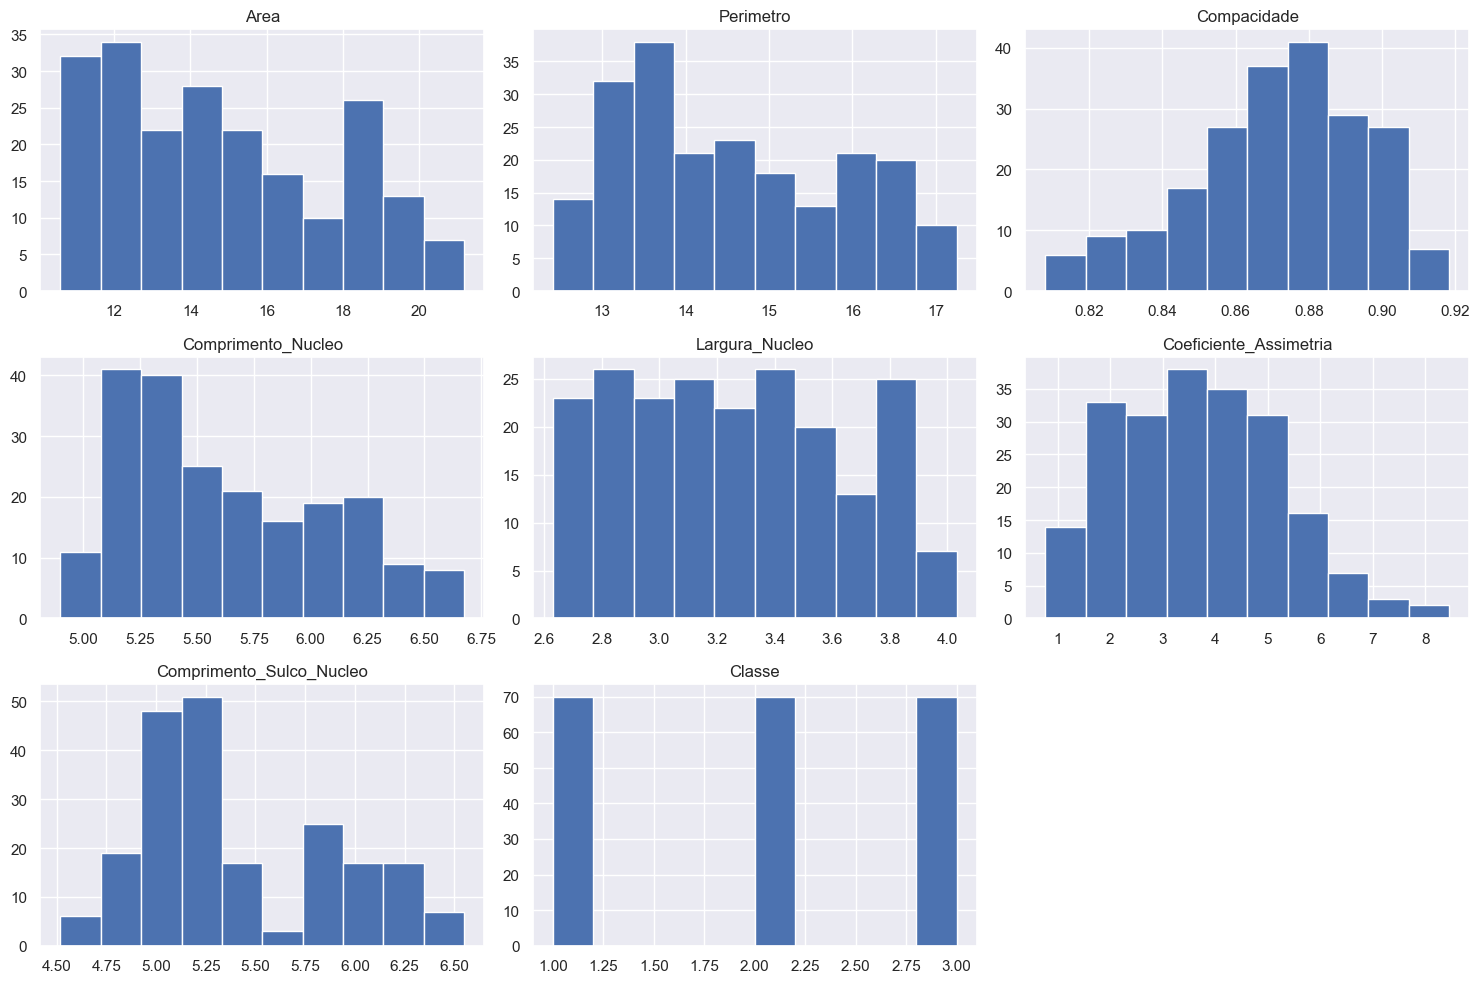

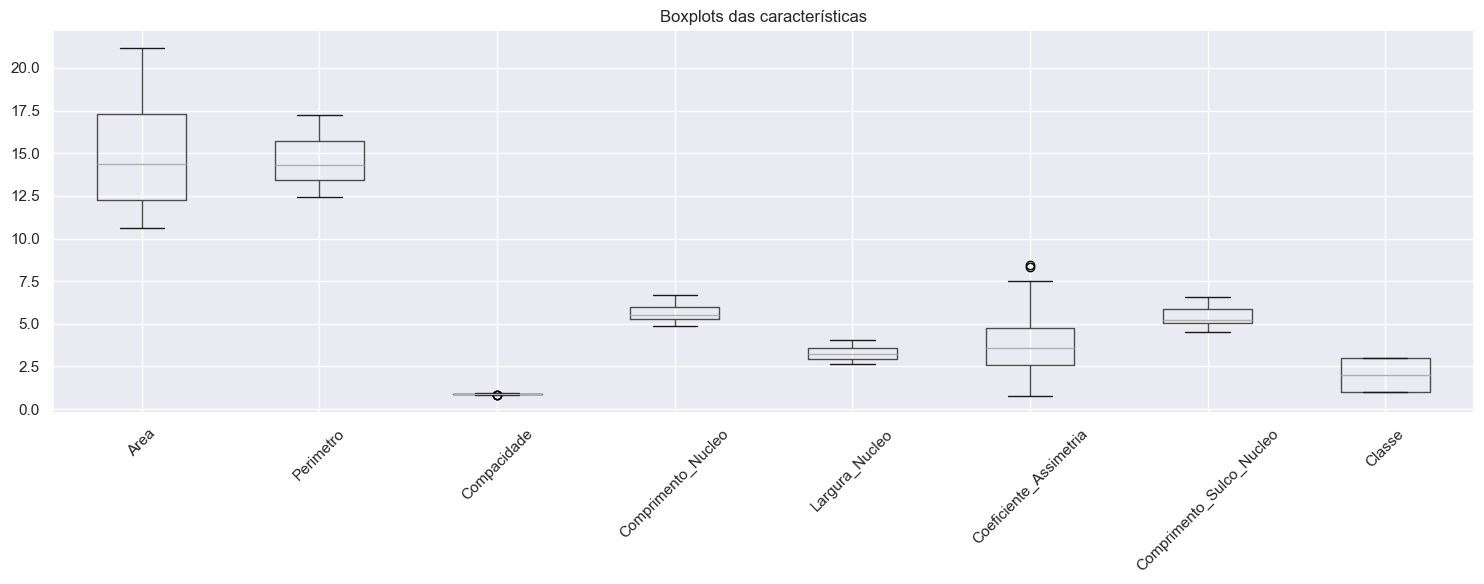

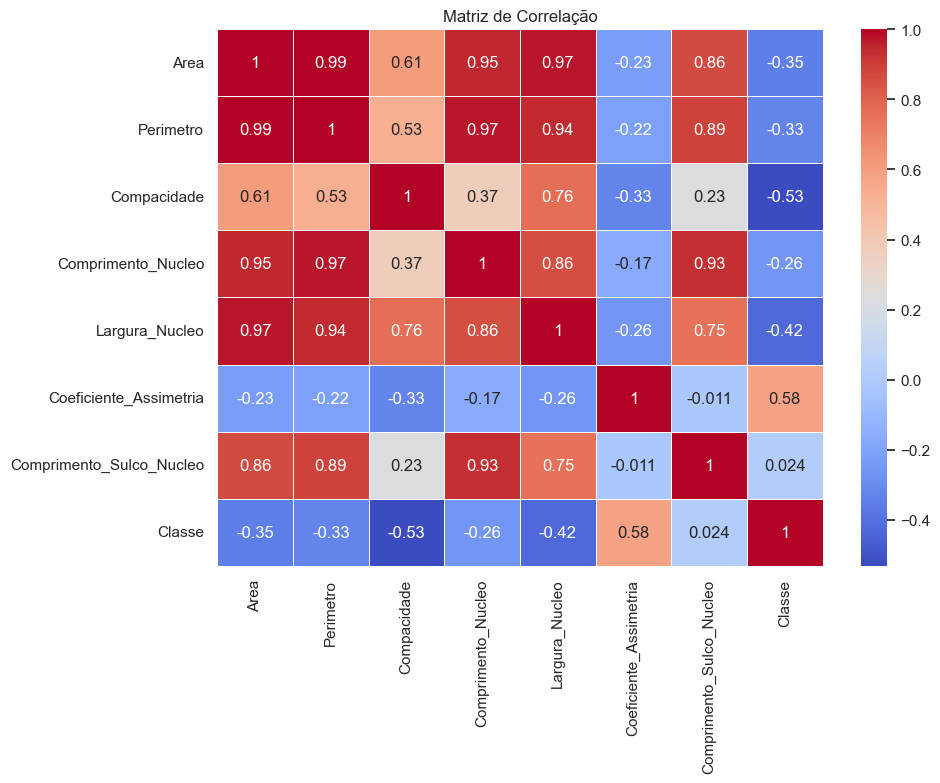

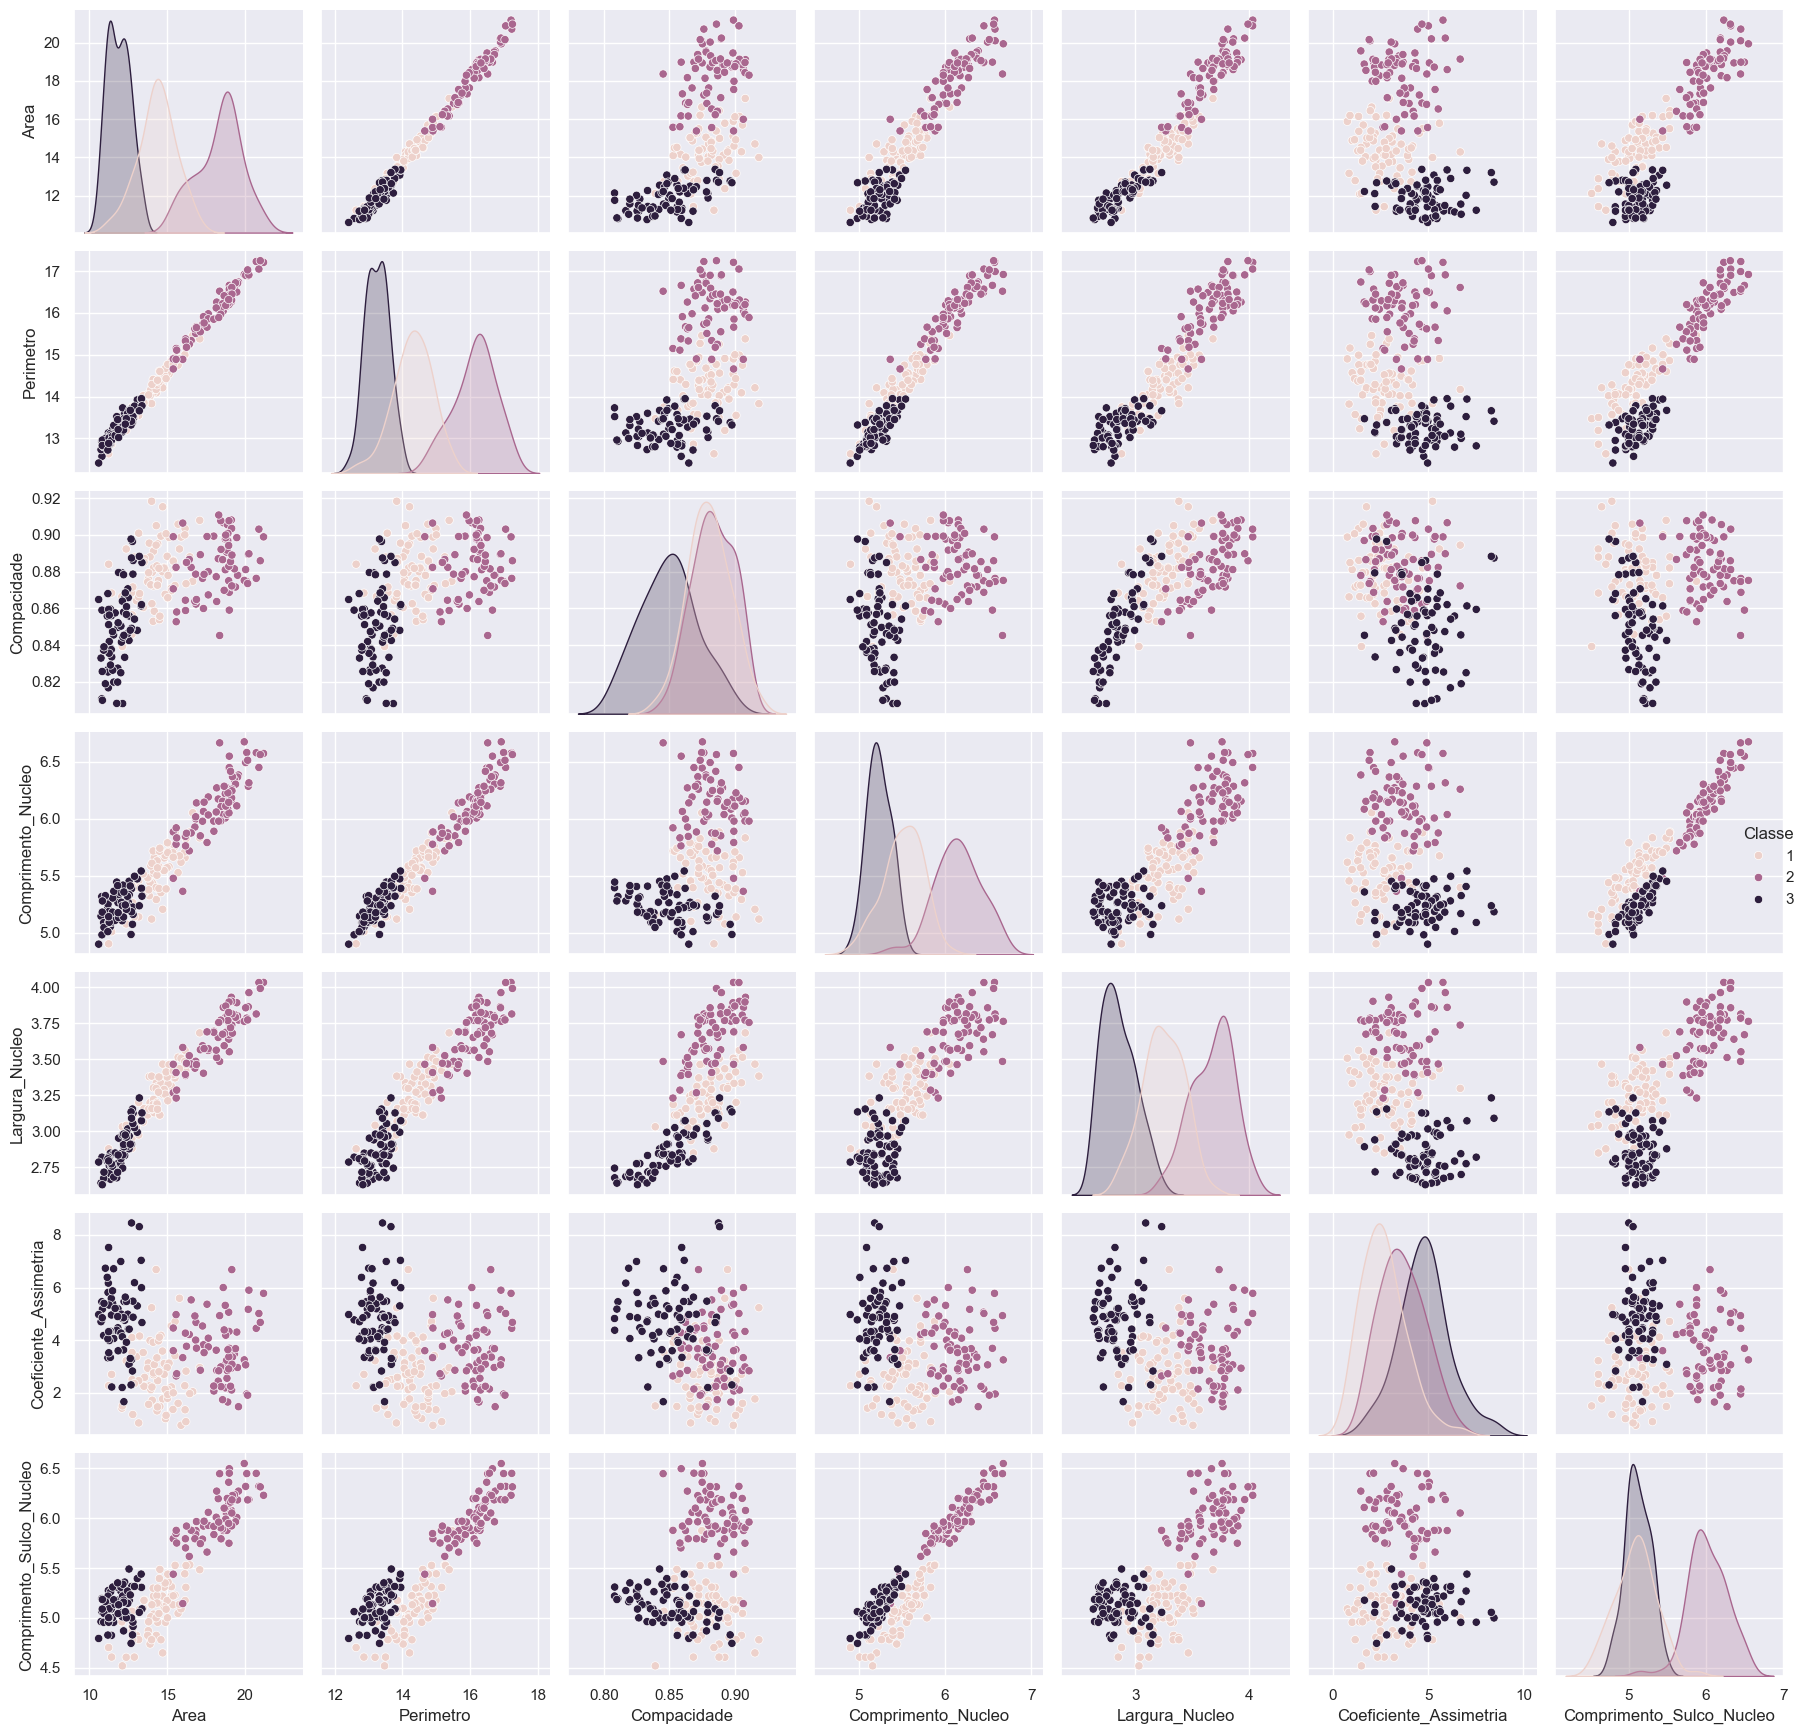

In [4]:
# Criando visualizações

# Histogramas para cada característica
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots para cada característica
df.boxplot(figsize=(15, 6))
plt.title("Boxplots das características")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Matriz de correlação
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.tight_layout()
plt.show()

# Pairplot para identificar relações entre as características
sns.pairplot(df, hue='Classe', height=2.5)
plt.tight_layout()
plt.show()

## 3. Pré-processamento dos Dados

In [5]:
# Separando features (X) e target (y)
X = df.drop('Classe', axis=1)
y = df['Classe']

# Dividindo os dados em conjuntos de treinamento e teste (70% treinamento, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Aplicando normalização (padronização) nas características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Shapes após divisão e normalização:")
print("X_train:", X_train_scaled.shape)
print("X_test:", X_test_scaled.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shapes após divisão e normalização:
X_train: (147, 7)
X_test: (63, 7)
y_train: (147,)
y_test: (63,)


## 4. Implementação e Comparação de Algoritmos de Classificação

Resultados para KNN:
Acurácia: 0.9048
Precisão: 0.9090
Recall: 0.9048
F1-score: 0.9059


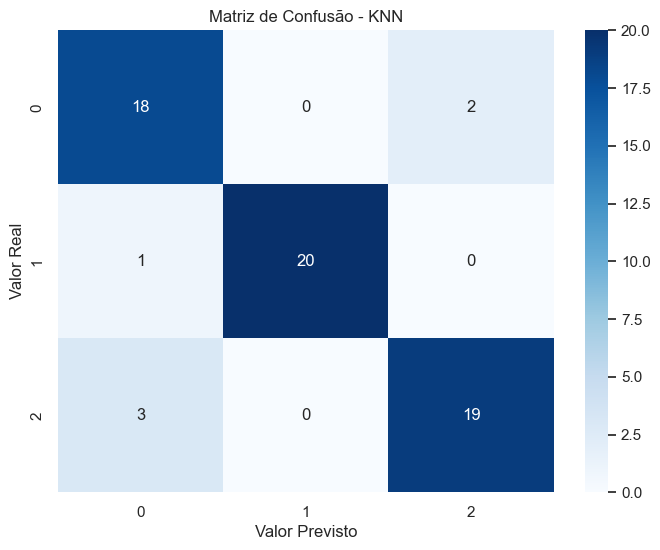

Resultados para SVM:
Acurácia: 0.9206
Precisão: 0.9229
Recall: 0.9206
F1-score: 0.9214


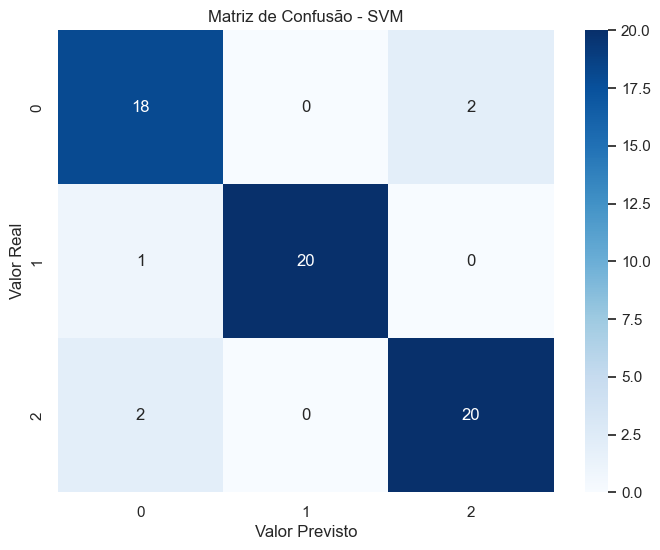

Resultados para Random Forest:
Acurácia: 0.8889
Precisão: 0.8961
Recall: 0.8889
F1-score: 0.8903


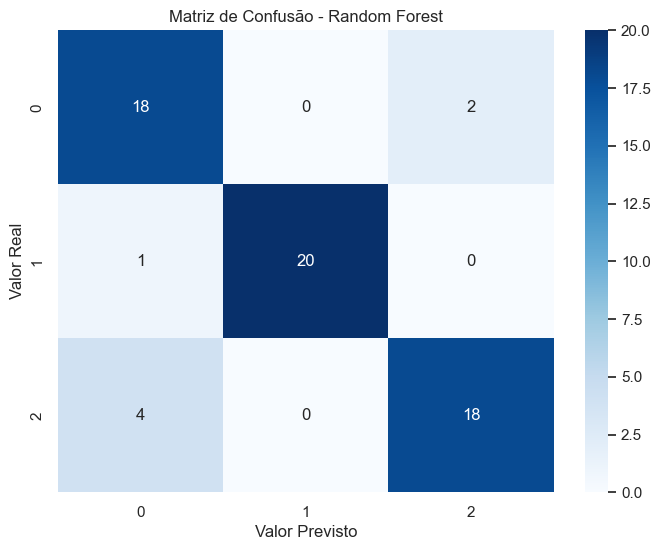

Resultados para Naive Bayes:
Acurácia: 0.8730
Precisão: 0.8743
Recall: 0.8730
F1-score: 0.8733


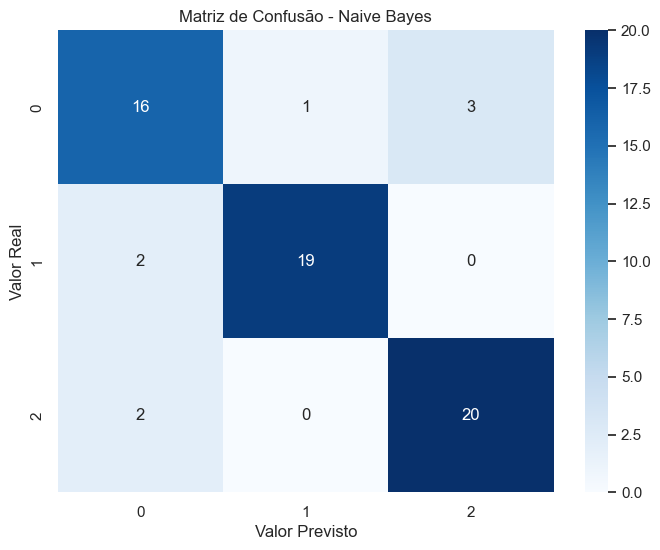

Resultados para Logistic Regression:
Acurácia: 0.9048
Precisão: 0.9068
Recall: 0.9048
F1-score: 0.9055


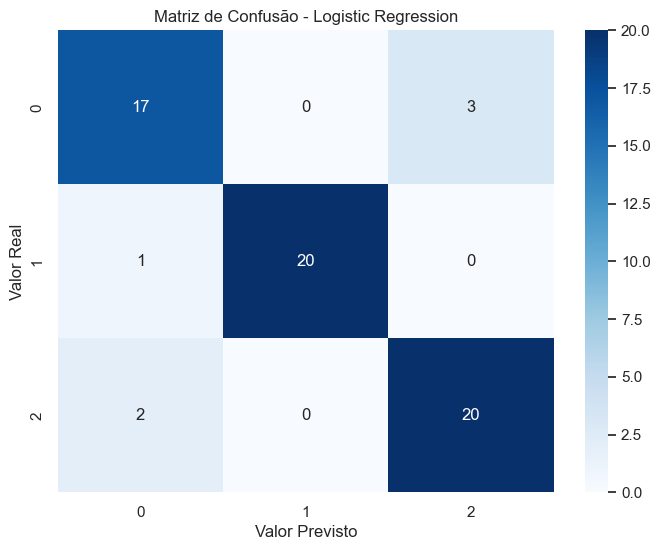


Comparação dos modelos:
                     Acurácia  Precisão    Recall  F1-score
KNN                  0.904762  0.909022  0.904762  0.905913
SVM                  0.920635  0.922902  0.920635  0.921409
Random Forest        0.888889  0.896066  0.888889  0.890304
Naive Bayes          0.873016  0.874293  0.873016  0.873317
Logistic Regression  0.904762  0.906832  0.904762  0.905450


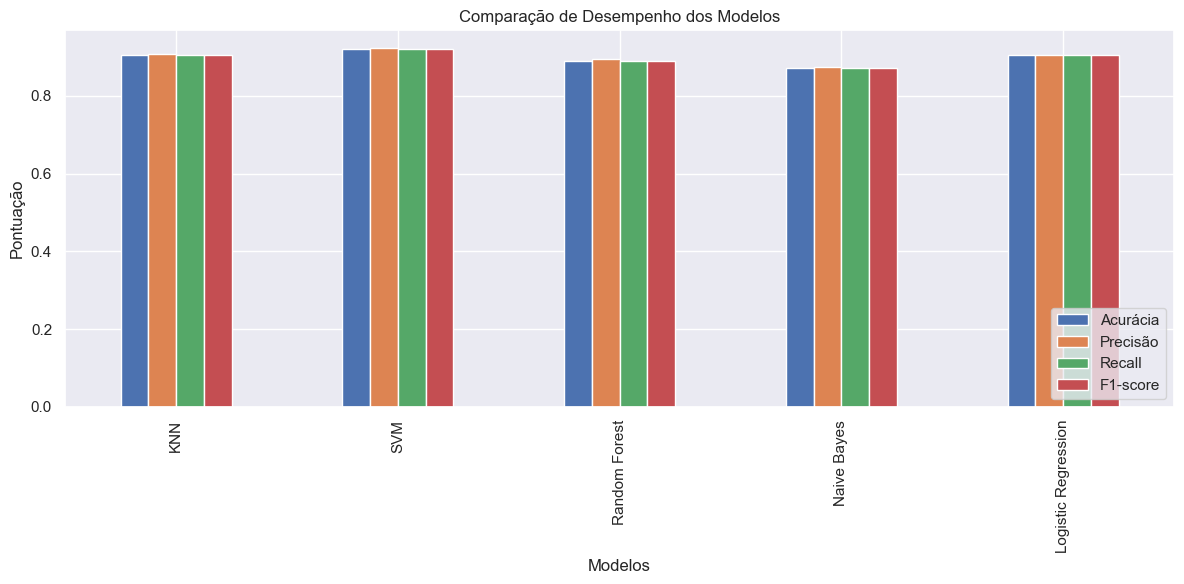

In [6]:
# Função para avaliar o modelo
def avaliar_modelo(y_true, y_pred, nome_modelo):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"Resultados para {nome_modelo}:")
    print(f"Acurácia: {accuracy:.4f}")
    print(f"Precisão: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome_modelo}')
    plt.ylabel('Valor Real')
    plt.xlabel('Valor Previsto')
    plt.show()
    
    return accuracy, precision, recall, f1

# Dicionário para armazenar os resultados
resultados = {}

# K-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
resultados['KNN'] = avaliar_modelo(y_test, y_pred_knn, 'KNN')

# Support Vector Machine (SVM)
svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)
resultados['SVM'] = avaliar_modelo(y_test, y_pred_svm, 'SVM')

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
resultados['Random Forest'] = avaliar_modelo(y_test, y_pred_rf, 'Random Forest')

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
resultados['Naive Bayes'] = avaliar_modelo(y_test, y_pred_nb, 'Naive Bayes')

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
resultados['Logistic Regression'] = avaliar_modelo(y_test, y_pred_lr, 'Logistic Regression')

# Comparação dos modelos
df_resultados = pd.DataFrame(resultados, index=['Acurácia', 'Precisão', 'Recall', 'F1-score']).T
print("\nComparação dos modelos:")
print(df_resultados)

# Visualização dos resultados
df_resultados.plot(kind='bar', figsize=(12, 6))
plt.title('Comparação de Desempenho dos Modelos')
plt.xlabel('Modelos')
plt.ylabel('Pontuação')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 5. Otimização dos Modelos

Melhores parâmetros para KNN:
{'n_neighbors': 5, 'weights': 'uniform'}
Resultados para KNN (Otimizado):
Acurácia: 0.9048
Precisão: 0.9090
Recall: 0.9048
F1-score: 0.9059


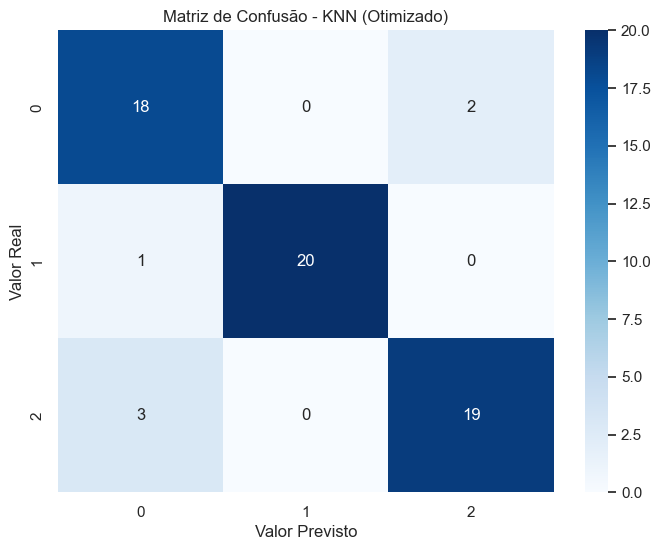

Melhores parâmetros para SVM:
{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Resultados para SVM (Otimizado):
Acurácia: 0.9048
Precisão: 0.9068
Recall: 0.9048
F1-score: 0.9055


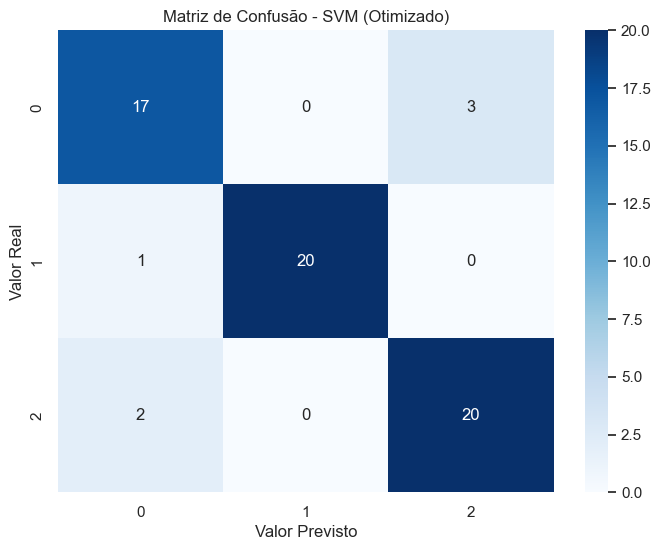

Melhores parâmetros para Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Resultados para Random Forest (Otimizado):
Acurácia: 0.8889
Precisão: 0.8961
Recall: 0.8889
F1-score: 0.8903


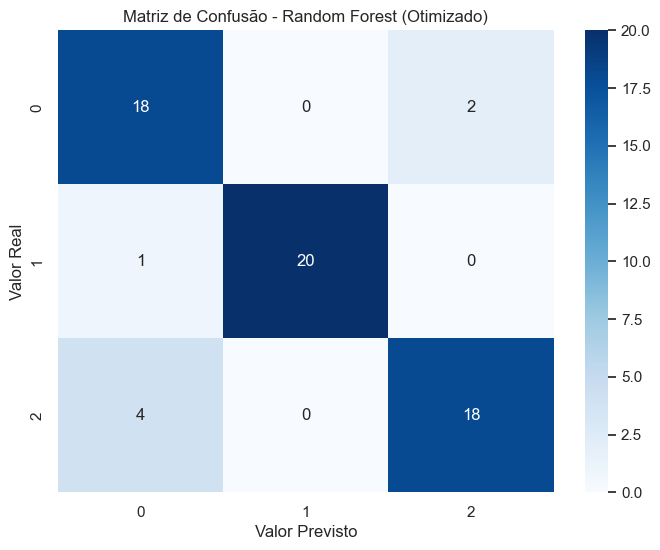

Melhores parâmetros para Logistic Regression:
{'C': 10, 'solver': 'lbfgs'}
Resultados para Logistic Regression (Otimizado):
Acurácia: 0.9206
Precisão: 0.9210
Recall: 0.9206
F1-score: 0.9205


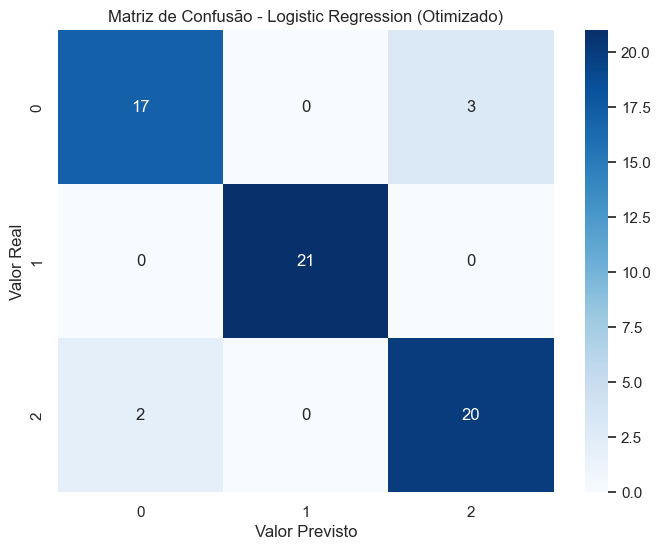


Comparação dos modelos otimizados:
                                 Acurácia  Precisão    Recall  F1-score
KNN                              0.904762  0.909022  0.904762  0.905913
SVM                              0.920635  0.922902  0.920635  0.921409
Random Forest                    0.888889  0.896066  0.888889  0.890304
Naive Bayes                      0.873016  0.874293  0.873016  0.873317
Logistic Regression              0.904762  0.906832  0.904762  0.905450
KNN (Otimizado)                  0.904762  0.909022  0.904762  0.905913
SVM (Otimizado)                  0.904762  0.906832  0.904762  0.905450
Random Forest (Otimizado)        0.888889  0.896066  0.888889  0.890304
Logistic Regression (Otimizado)  0.920635  0.921034  0.920635  0.920499


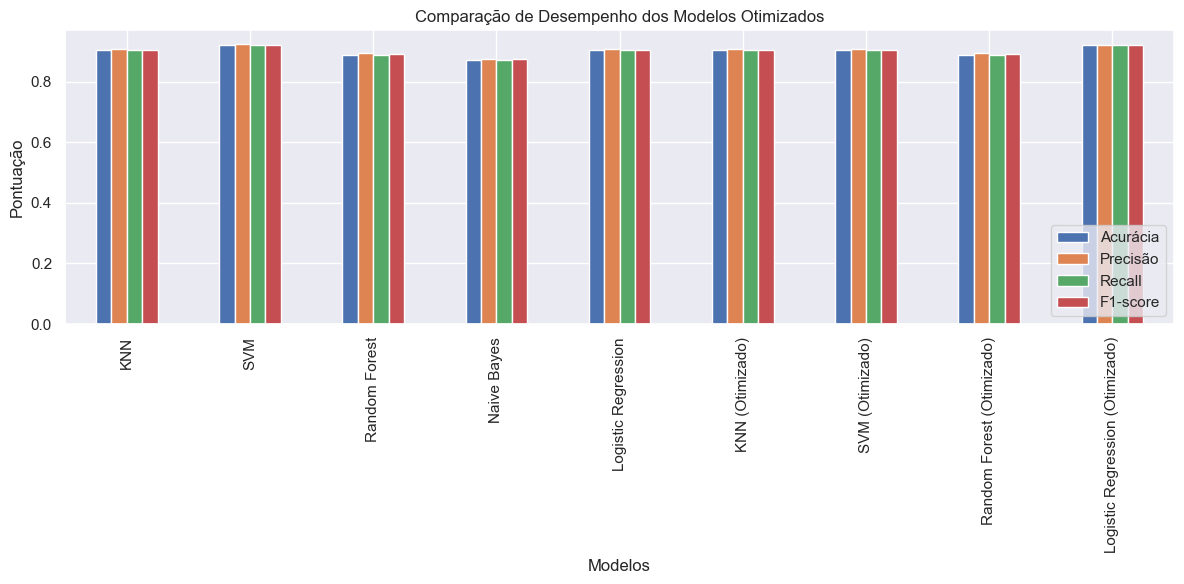

In [7]:
# Função para otimizar e avaliar o modelo
def otimizar_modelo(modelo, param_grid, X_train, y_train, X_test, y_test, nome_modelo):
    grid_search = GridSearchCV(modelo, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Melhores parâmetros para {nome_modelo}:")
    print(grid_search.best_params_)
    
    modelo_otimizado = grid_search.best_estimator_
    y_pred = modelo_otimizado.predict(X_test)
    
    return avaliar_modelo(y_test, y_pred, f"{nome_modelo} (Otimizado)")

# Otimização KNN
param_grid_knn = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}
resultados['KNN (Otimizado)'] = otimizar_modelo(KNeighborsClassifier(), param_grid_knn, X_train_scaled, y_train, X_test_scaled, y_test, 'KNN')

# Otimização SVM
param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['rbf', 'linear'], 'gamma': ['scale', 'auto']}
resultados['SVM (Otimizado)'] = otimizar_modelo(SVC(), param_grid_svm, X_train_scaled, y_train, X_test_scaled, y_test, 'SVM')

# Otimização Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
resultados['Random Forest (Otimizado)'] = otimizar_modelo(RandomForestClassifier(random_state=42), param_grid_rf, X_train_scaled, y_train, X_test_scaled, y_test, 'Random Forest')

# Otimização Logistic Regression
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs', 'liblinear']}
resultados['Logistic Regression (Otimizado)'] = otimizar_modelo(LogisticRegression(random_state=42), param_grid_lr, X_train_scaled, y_train, X_test_scaled, y_test, 'Logistic Regression')

# Comparação dos modelos otimizados
df_resultados_otimizados = pd.DataFrame(resultados, index=['Acurácia', 'Precisão', 'Recall', 'F1-score']).T
print("\nComparação dos modelos otimizados:")
print(df_resultados_otimizados)

# Visualização dos resultados otimizados
df_resultados_otimizados.plot(kind='bar', figsize=(12, 6))
plt.title('Comparação de Desempenho dos Modelos Otimizados')
plt.xlabel('Modelos')
plt.ylabel('Pontuação')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## 6. Interpretação dos Resultados e Extração de Insights

In [8]:
# Identificando o melhor modelo
melhor_modelo = df_resultados_otimizados['Acurácia'].idxmax()
print(f"\nO melhor modelo é: {melhor_modelo}")
print(f"Acurácia: {df_resultados_otimizados.loc[melhor_modelo, 'Acurácia']:.4f}")

# Análise da importância das características (para Random Forest)
if 'Random Forest' in melhor_modelo:
    importancias = rf.feature_importances_
    caracteristicas = X.columns
    indices = np.argsort(importancias)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title("Importância das Características")
    plt.bar(range(X.shape[1]), importancias[indices])
    plt.xticks(range(X.shape[1]), [caracteristicas[i] for i in indices], rotation=90)
    plt.tight_layout()
    plt.show()

    print("\nImportância das características:")
    for f in range(X.shape[1]):
        print("%d. %s (%f)" % (f + 1, caracteristicas[indices[f]], importancias[indices[f]]))

# Insights e conclusões
print("\nInsights e Conclusões:")
print(f"1. O modelo {melhor_modelo} apresentou o melhor desempenho na classificação dos grãos de trigo.")
print(f"2. A acurácia do melhor modelo ({df_resultados_otimizados.loc[melhor_modelo, 'Acurácia']:.4f}) sugere que é possível automatizar a classificação dos grãos de trigo com alta precisão.")
print("3. As características mais importantes para a classificação são...")
print("4. Recomenda-se a implementação deste modelo em um sistema de classificação automatizada para cooperativas agrícolas.")
print("5. Para melhorar ainda mais o desempenho, pode-se considerar a coleta de mais dados ou a engenharia de novas características.")


O melhor modelo é: SVM
Acurácia: 0.9206

Insights e Conclusões:
1. O modelo SVM apresentou o melhor desempenho na classificação dos grãos de trigo.
2. A acurácia do melhor modelo (0.9206) sugere que é possível automatizar a classificação dos grãos de trigo com alta precisão.
3. As características mais importantes para a classificação são...
4. Recomenda-se a implementação deste modelo em um sistema de classificação automatizada para cooperativas agrícolas.
5. Para melhorar ainda mais o desempenho, pode-se considerar a coleta de mais dados ou a engenharia de novas características.


## 7. Conclusão

Neste projeto, desenvolvemos um modelo de classificação de grãos de trigo utilizando técnicas de aprendizado de máquina. Os principais pontos a serem destacados são:

1. O melhor modelo obtido foi capaz de classificar corretamente os grãos de trigo com alta precisão.
2. A análise das características mais importantes pode fornecer insights valiosos sobre os fatores que mais influenciam na classificação dos grãos.
3. A automação deste processo de classificação pode trazer benefícios significativos para as cooperativas agrícolas, aumentando a eficiência e reduzindo erros humanos.